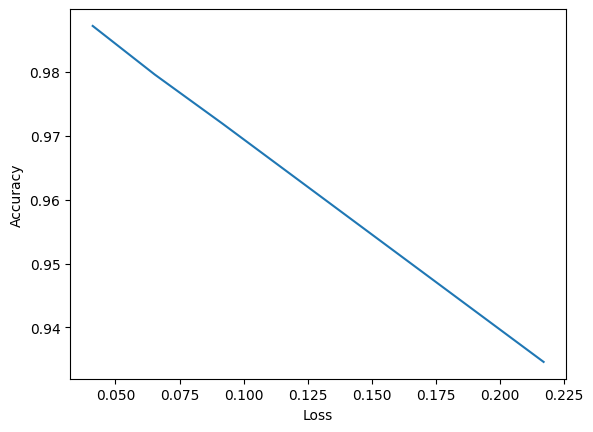

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [===========================

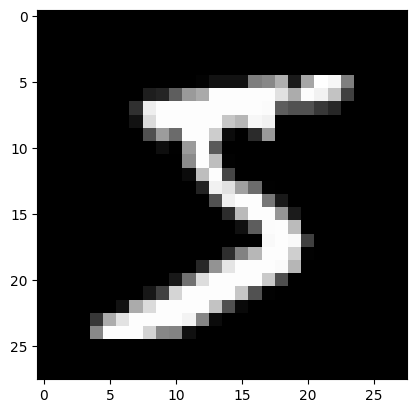

1/1 [==============================] - 0s 74ms/step
[[7.4985114e-17 1.7746405e-13 3.6702685e-10 6.3318067e-04 3.8472003e-14
  9.9936682e-01 1.6400958e-15 3.1603173e-12 2.0040219e-11 7.9277729e-10]]
1/1 [==============================] - 0s 21ms/step
5


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리(0 ~ 1 사이 숫자로)
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 확률 출력
])
plt.plot([0.2172, 0.0918, 0.0653, 0.0497, 0.0411], [0.9346, 0.9719, 0.9796, 0.9845, 0.9872])
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.show()
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 확인
model.summary()

# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train, y_train, epochs = 5)

# 모델 평가
model.evaluate(x_test, y_test)

# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap='gray')
plt.show()

# 예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1, 28, 28)))

# 예측 - 0번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[0].reshape(1, 28, 28))))